# Imports

In [68]:
import kagglehub
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, roc_curve, auc
import shap

# 0. Import de Dados

In [2]:
# Download latest version
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")

print("Path to dataset files:", path)

Path to dataset files: /home/gustavo/.cache/kagglehub/datasets/uciml/pima-indians-diabetes-database/versions/1


In [3]:
df = pd.read_csv(path+'/diabetes.csv')

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# 1. Análise Exploratória de Dados (EDA)

In [5]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
# Missing values

df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# Duplicated

df.duplicated().sum()

np.int64(0)

In [8]:
# Data description

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# PONTO DE ATENÇÃO: Zero em insulina, pressão sanguínea, espessura de pele, IMC e/ou glicose são biologicamente improváveis

In [10]:
df['Insulin'].value_counts(normalize=True)

Insulin
0      0.486979
105    0.014323
130    0.011719
140    0.011719
120    0.010417
         ...   
178    0.001302
127    0.001302
510    0.001302
16     0.001302
112    0.001302
Name: proportion, Length: 186, dtype: float64

In [11]:
df['Glucose'].value_counts(normalize=True).sort_index()

Glucose
0      0.006510
44     0.001302
56     0.001302
57     0.002604
61     0.001302
         ...   
195    0.002604
196    0.003906
197    0.005208
198    0.001302
199    0.001302
Name: proportion, Length: 136, dtype: float64

In [12]:
df['BloodPressure'].value_counts(normalize=True).sort_index()

BloodPressure
0      0.045573
24     0.001302
30     0.002604
38     0.001302
40     0.001302
44     0.005208
46     0.002604
48     0.006510
50     0.016927
52     0.014323
54     0.014323
55     0.002604
56     0.015625
58     0.027344
60     0.048177
61     0.001302
62     0.044271
64     0.055990
65     0.009115
66     0.039062
68     0.058594
70     0.074219
72     0.057292
74     0.067708
75     0.010417
76     0.050781
78     0.058594
80     0.052083
82     0.039062
84     0.029948
85     0.007812
86     0.027344
88     0.032552
90     0.028646
92     0.010417
94     0.007812
95     0.001302
96     0.005208
98     0.003906
100    0.003906
102    0.001302
104    0.002604
106    0.003906
108    0.002604
110    0.003906
114    0.001302
122    0.001302
Name: proportion, dtype: float64

In [13]:
df['SkinThickness'].value_counts(normalize=True).sort_index()

SkinThickness
0     0.295573
7     0.002604
8     0.002604
10    0.006510
11    0.007812
12    0.009115
13    0.014323
14    0.007812
15    0.018229
16    0.007812
17    0.018229
18    0.026042
19    0.023438
20    0.016927
21    0.013021
22    0.020833
23    0.028646
24    0.015625
25    0.020833
26    0.020833
27    0.029948
28    0.026042
29    0.022135
30    0.035156
31    0.024740
32    0.040365
33    0.026042
34    0.010417
35    0.019531
36    0.018229
37    0.020833
38    0.009115
39    0.023438
40    0.020833
41    0.019531
42    0.014323
43    0.007812
44    0.006510
45    0.007812
46    0.010417
47    0.005208
48    0.005208
49    0.003906
50    0.003906
51    0.001302
52    0.002604
54    0.002604
56    0.001302
60    0.001302
63    0.001302
99    0.001302
Name: proportion, dtype: float64

In [14]:
df['BMI'].value_counts(normalize=True).sort_index()

BMI
0.0     0.014323
18.2    0.003906
18.4    0.001302
19.1    0.001302
19.3    0.001302
          ...   
53.2    0.001302
55.0    0.001302
57.3    0.001302
59.4    0.001302
67.1    0.001302
Name: proportion, Length: 248, dtype: float64

In [15]:
# Remover a variável Insulina

df = df.drop(columns='Insulin')

In [16]:
# Filtrar glicose !=0

df = df[df['Glucose']!=0]

In [17]:
# Filtrar BloodPressure < 40

df = df[df['BloodPressure']> 40]

In [18]:
# Substituir os zeros em 'SkinThickness'pela mediana de cada Outcome

df['SkinThickness'] = df.groupby('Outcome')['SkinThickness'].transform(
    lambda x: x.replace(0, x.median())
)

In [19]:
# Filtrar BMI !=0

df = df[df['BMI']!=0]

In [20]:
# Proporção Target

df['Outcome'].value_counts(normalize=True)

Outcome
0    0.656467
1    0.343533
Name: proportion, dtype: float64

In [21]:
df['Outcome'].value_counts()

Outcome
0    472
1    247
Name: count, dtype: int64

In [290]:
# Visualizações iniciais:

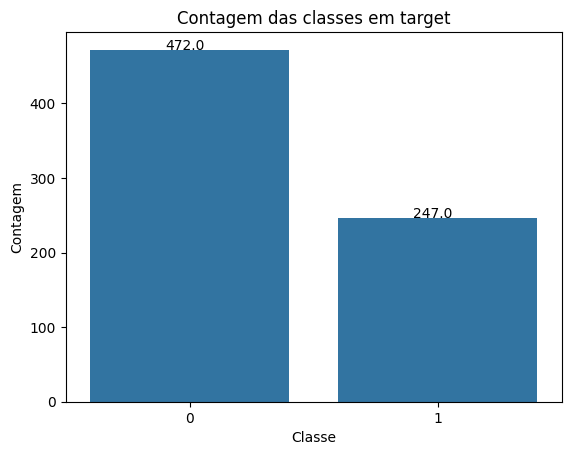

In [22]:
# Visual target distribution

ax = sns.countplot(x='Outcome', data=df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + 0.3, p.get_height() + 0.1))
plt.title('Contagem das classes em target')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.show()

[]

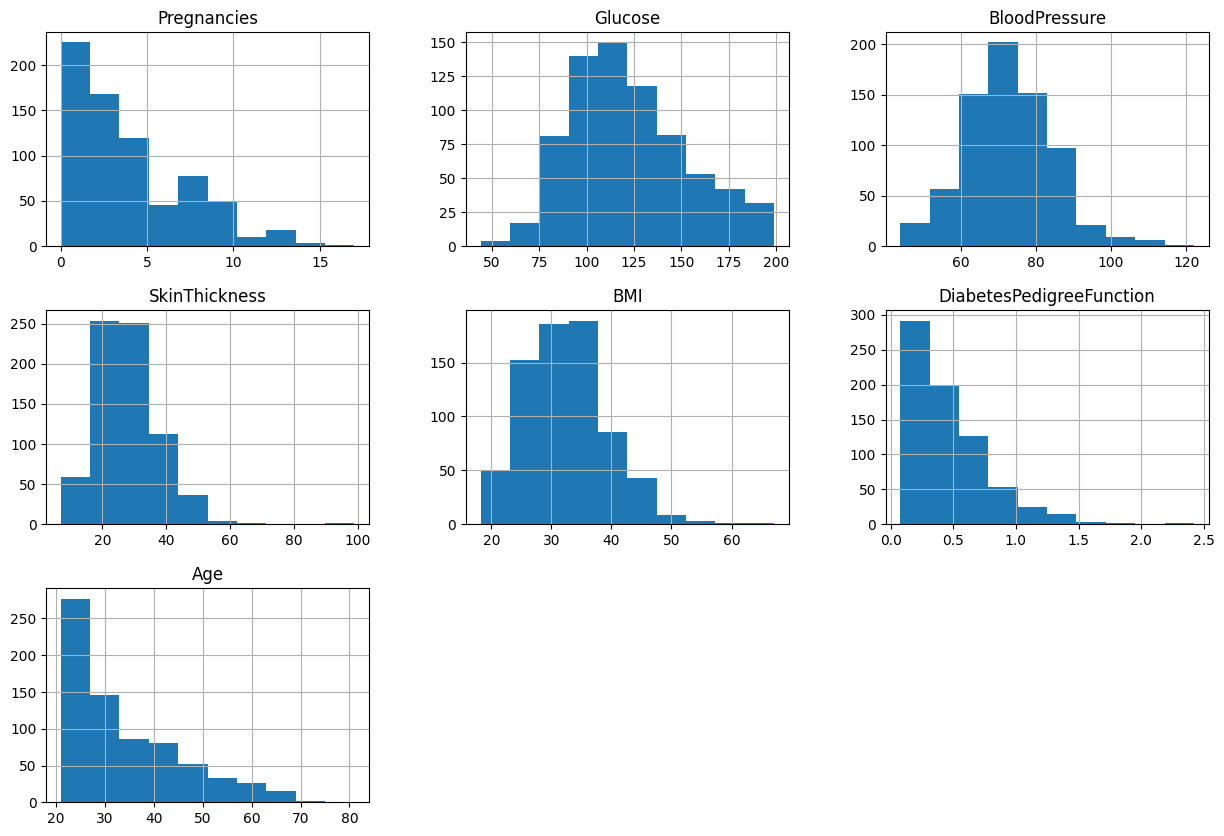

In [23]:
df.drop(columns=['Outcome']).hist(figsize=(15,10))
plt.plot()

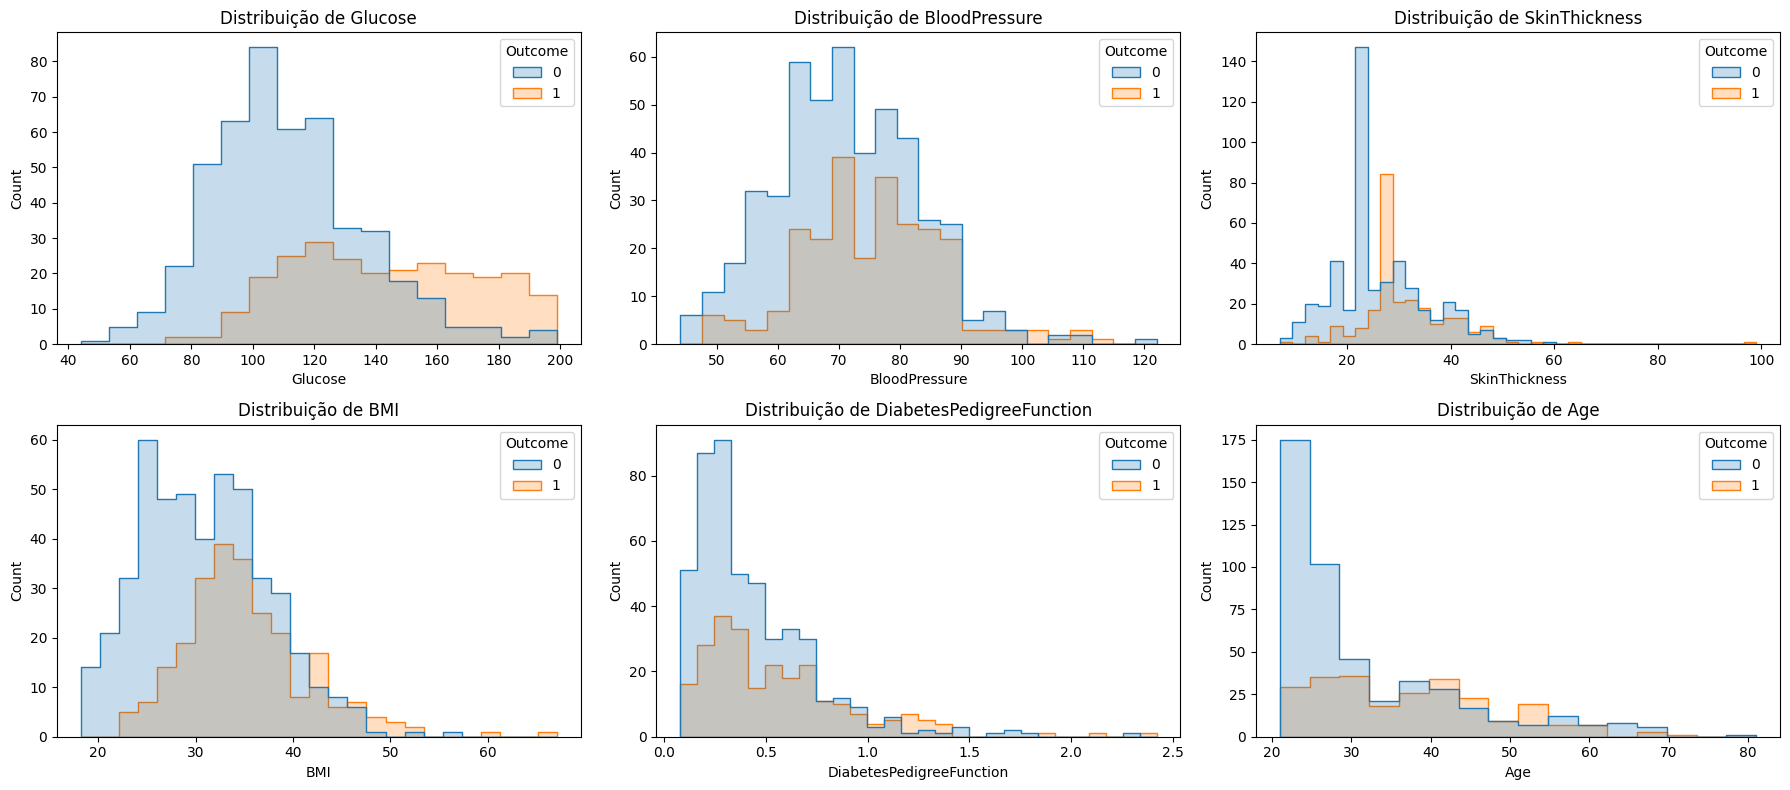

In [24]:

# Lista de colunas numéricas, exceto 'Outcome'
num_vars = df.drop(columns=['Pregnancies']).select_dtypes(include='number').columns.drop('Outcome')

# Configuração do layout de subplots
n_cols = 3
n_rows = -(-len(num_vars) // n_cols)  # Cálculo de linhas (arredonda para cima)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axes = axes.flatten()

# Loop para plotar cada histograma
for i, col in enumerate(num_vars):
    sns.histplot(data=df, x=col, hue='Outcome', ax=axes[i], element='step')  # Histogramas de contagem
    axes[i].set_title(f'Distribuição de {col}')

# Remove subplots vazios (se houver)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


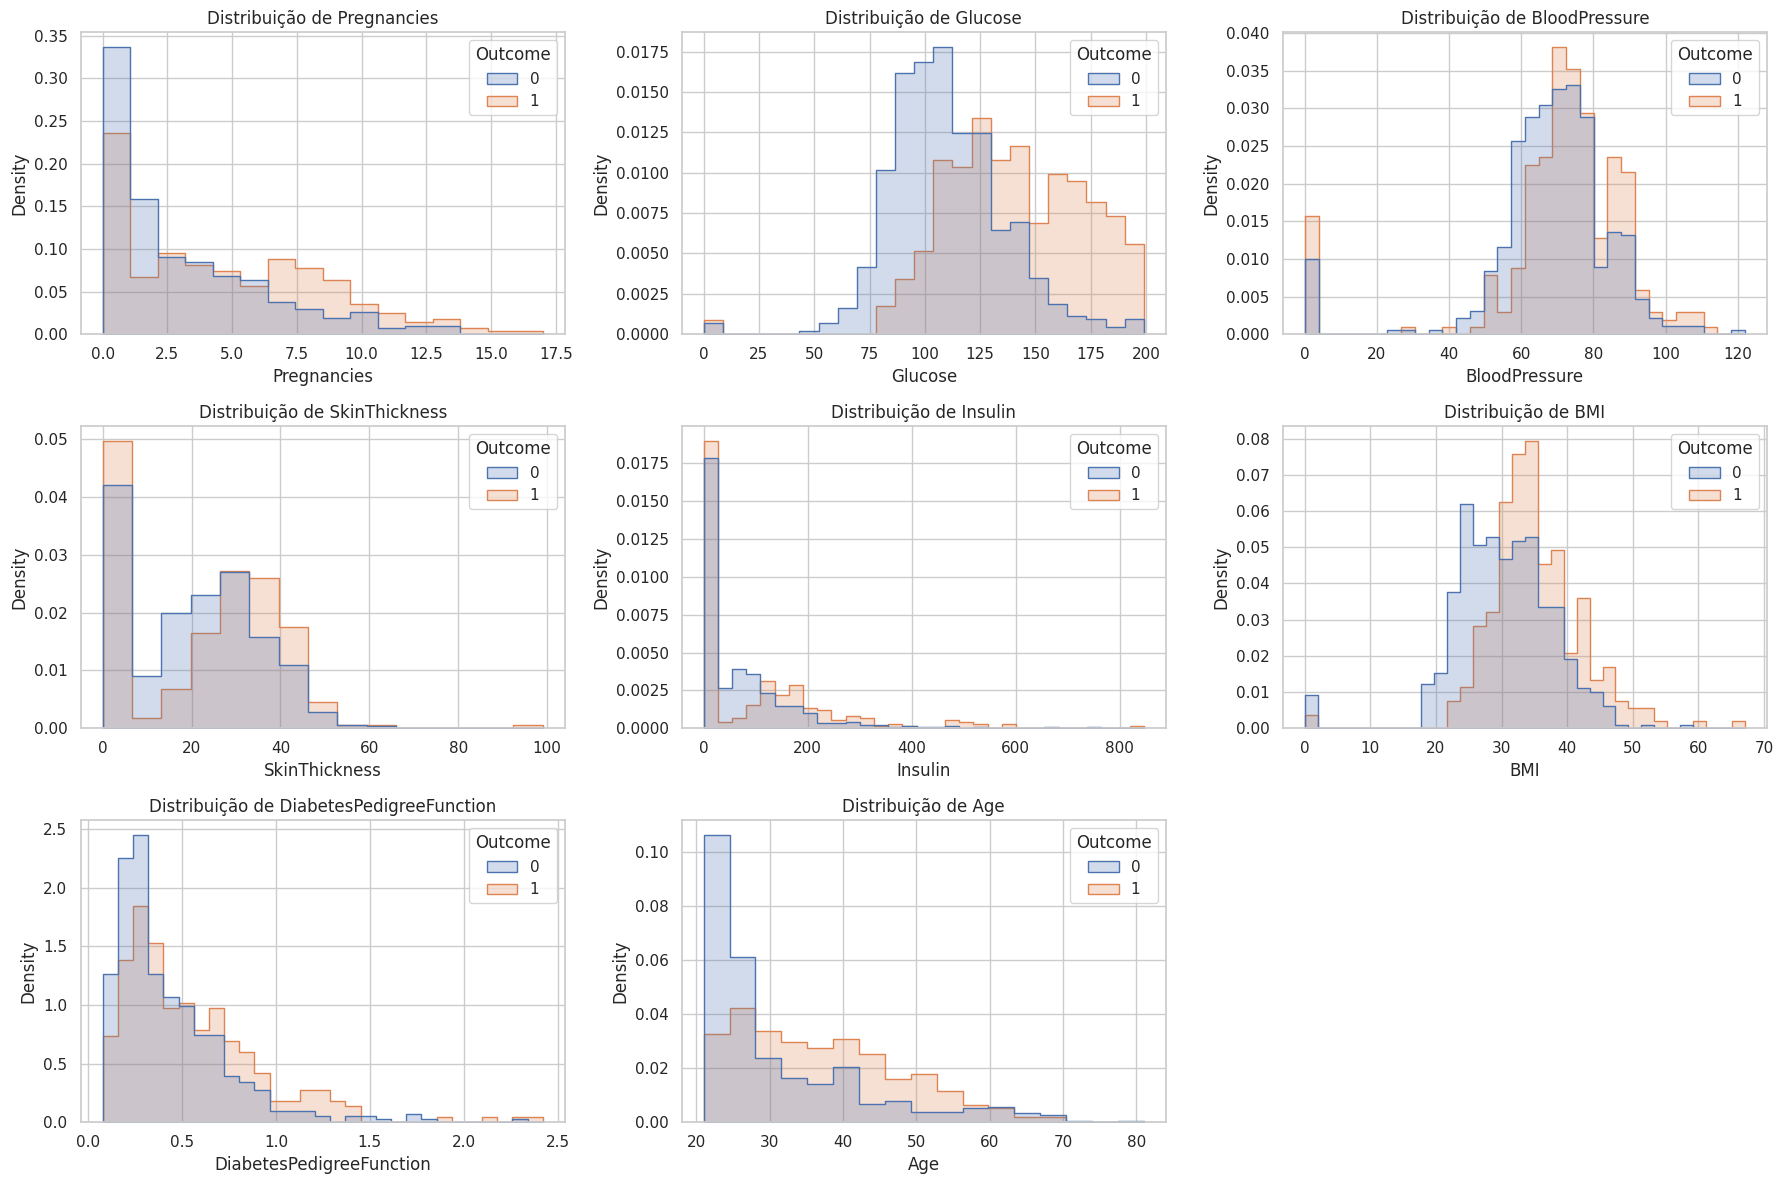

In [54]:

# Lista de colunas numéricas, exceto 'Outcome'
num_vars = df.select_dtypes(include='number').columns.drop('Outcome')

# Criação da grade de subplots
n_cols = 3
n_rows = -(-len(num_vars) // n_cols)  # Cálculo de linhas (arredondando para cima)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))

axes = axes.flatten()  # Facilita iteração

# Loop para criar um histplot para cada variável
for i, col in enumerate(num_vars):
    sns.histplot(data=df, x=col, hue='Outcome', ax=axes[i], element='step', stat='density', common_norm=False)
    axes[i].set_title(f'Distribuição de {col}')

# Remove eixos vazios, se houver
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


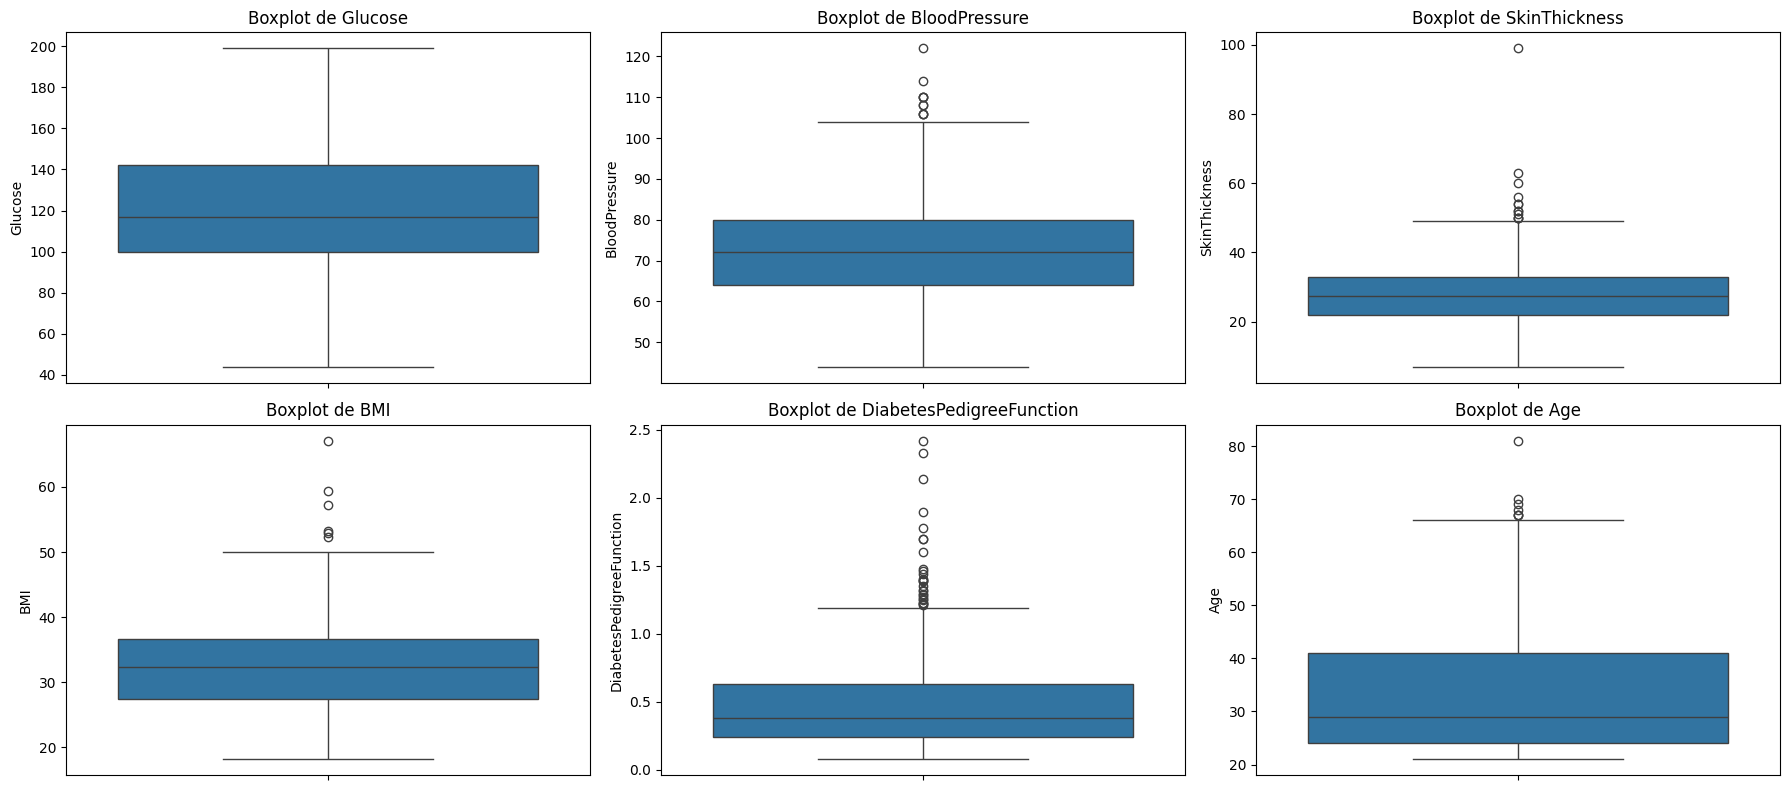

In [25]:
# Boxplots

# Lista de colunas numéricas, exceto 'Pregnancies' e 'Outcome'
num_vars = df.drop(columns=['Pregnancies']).select_dtypes(include='number').columns.drop('Outcome')

# Configuração do layout de subplots
n_cols = 3
n_rows = -(-len(num_vars) // n_cols)  # Arredonda para cima
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axes = axes.flatten()

# Loop para plotar cada boxplot
for i, col in enumerate(num_vars):
    sns.boxplot(data=df, y=col, ax=axes[i])
    axes[i].set_title(f'Boxplot de {col}')

# Remove subplots vazios (se houver)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


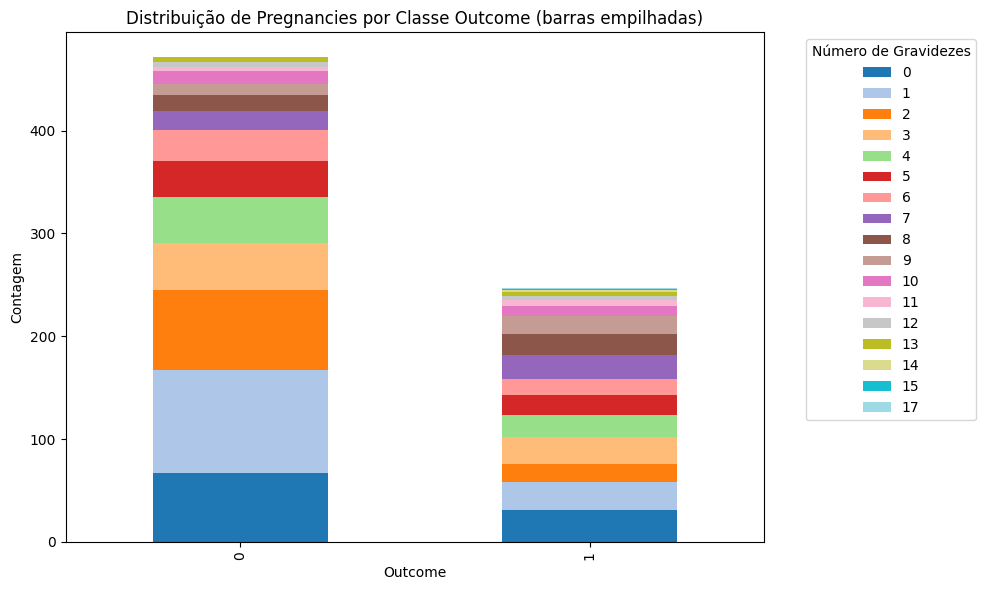

In [26]:

# Cria tabela cruzada: linhas = Outcome, colunas = Pregnancies
ct = pd.crosstab(df['Outcome'], df['Pregnancies'])

# Plota gráfico de barras empilhadas
ct.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')

plt.title('Distribuição de Pregnancies por Classe Outcome (barras empilhadas)')
plt.xlabel('Outcome')
plt.ylabel('Contagem')
plt.legend(title='Número de Gravidezes', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


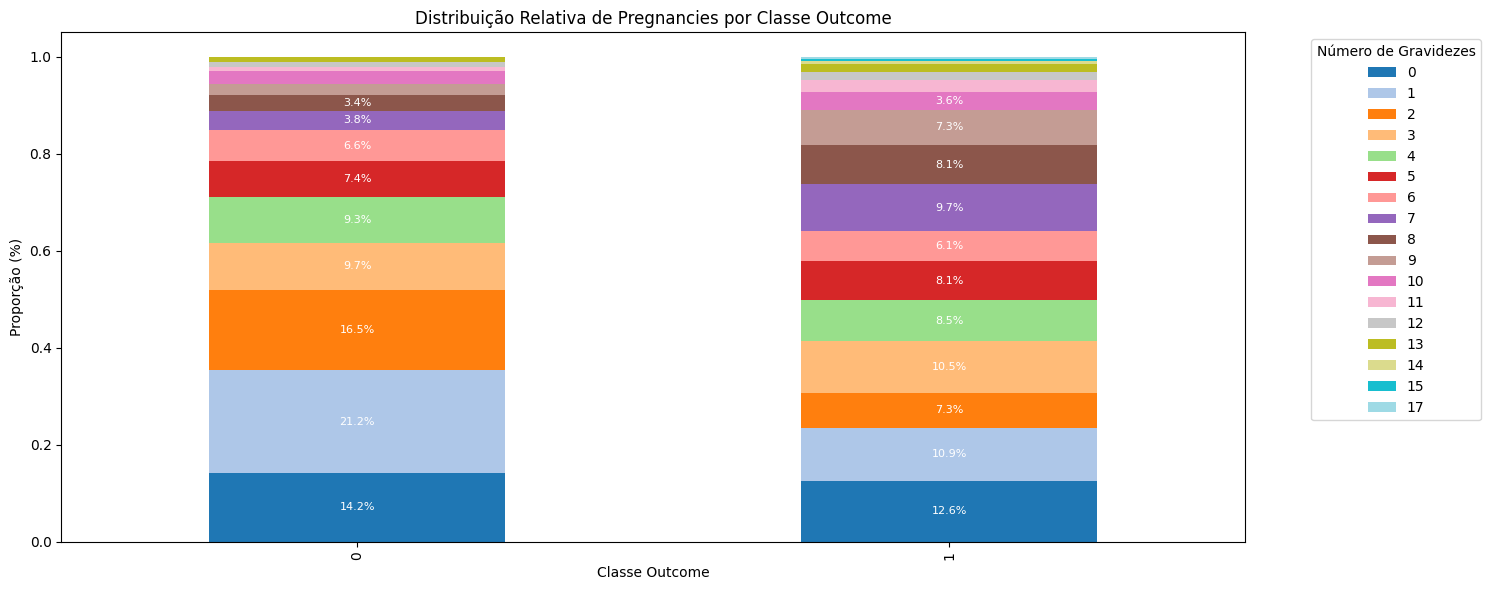

In [27]:


# Cria tabela cruzada: linhas = Outcome, colunas = Pregnancies
ct = pd.crosstab(df['Outcome'], df['Pregnancies'])

# Normaliza os dados por linha (proporção dentro de cada Outcome)
ct_norm = ct.div(ct.sum(axis=1), axis=0)

# Cria figura com tamanho customizado
plt.figure(figsize=(15, 6))  # <=== Modificar aqui o tamanho da figura (largura, altura)

# Cria o gráfico de barras empilhadas na figura atual
ax = ct_norm.plot(kind='bar', stacked=True, colormap='tab20', ax=plt.gca())

# Títulos e eixos
plt.title('Distribuição Relativa de Pregnancies por Classe Outcome')
plt.xlabel('Classe Outcome')
plt.ylabel('Proporção (%)')
plt.legend(title='Número de Gravidezes', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adiciona os percentuais dentro das barras
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0.03:  # Evita rótulos muito pequenos
            x = bar.get_x() + bar.get_width() / 2
            y = bar.get_y() + height / 2
            percent = f"{height * 100:.1f}%"
            ax.text(x, y, percent, ha='center', va='center', fontsize=8, color='white')

plt.tight_layout()
plt.show()


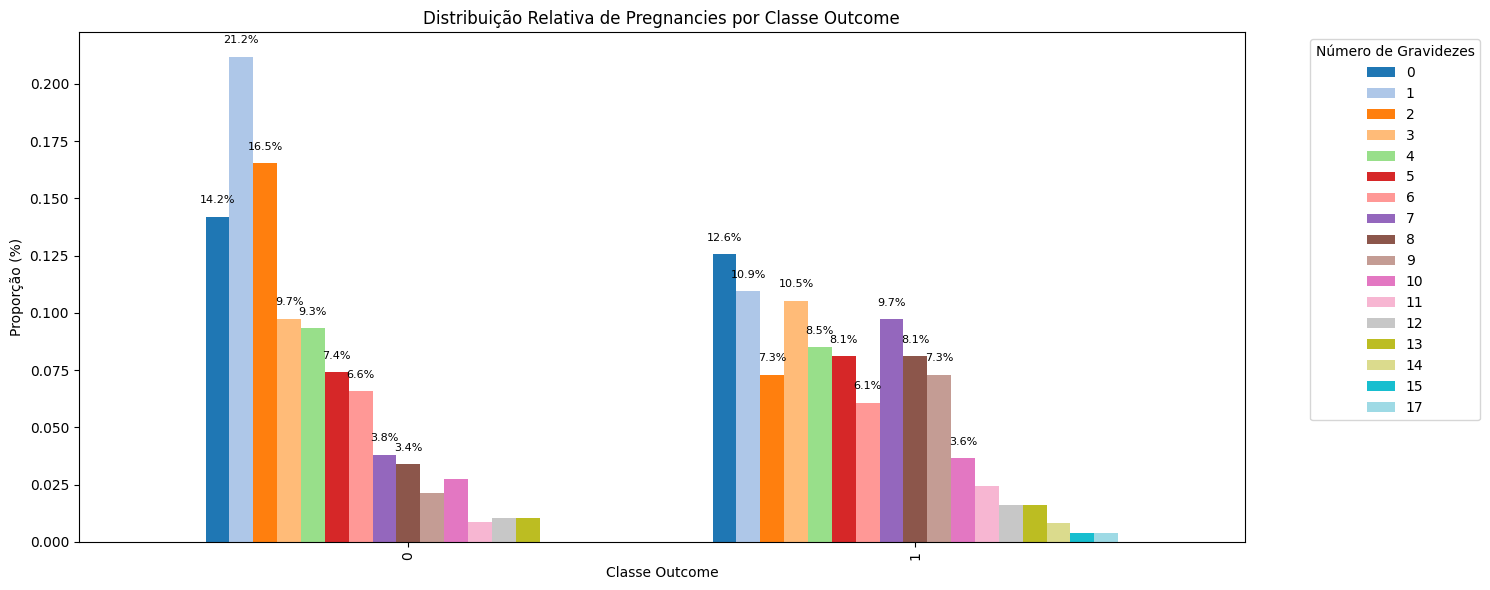

In [299]:


# Cria tabela cruzada: linhas = Outcome, colunas = Pregnancies
ct = pd.crosstab(df['Outcome'], df['Pregnancies'])

# Normaliza os dados por linha (proporção dentro de cada Outcome)
ct_norm = ct.div(ct.sum(axis=1), axis=0)

# Cria figura com tamanho customizado
plt.figure(figsize=(15, 6))  # largura, altura

# Cria o gráfico de barras lado a lado (grouped)
ax = ct_norm.plot(kind='bar', stacked=False, width=0.8, colormap='tab20', ax=plt.gca())

# Títulos e eixos
plt.title('Distribuição Relativa de Pregnancies por Classe Outcome')
plt.xlabel('Classe Outcome')
plt.ylabel('Proporção (%)')
plt.legend(title='Número de Gravidezes', bbox_to_anchor=(1.05, 1), loc='upper left')



# Adiciona os percentuais acima das barras (mais próximos ao topo)
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0.03:
            x = bar.get_x() + bar.get_width() / 2
            y = height + 0.005  # Deslocamento menor para aproximar do topo
            percent = f"{height * 100:.1f}%"
            ax.text(x, y, percent, ha='center', va='bottom', fontsize=8, color='black')




plt.tight_layout()
plt.show()


In [73]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.0,33.6,0.627,50,1
1,1,85,66,29.0,26.6,0.351,31,0
2,8,183,64,27.5,23.3,0.672,32,1
3,1,89,66,23.0,28.1,0.167,21,0
5,5,116,74,22.0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...
763,10,101,76,48.0,32.9,0.171,63,0
764,2,122,70,27.0,36.8,0.340,27,0
765,5,121,72,23.0,26.2,0.245,30,0
766,1,126,60,27.5,30.1,0.349,47,1


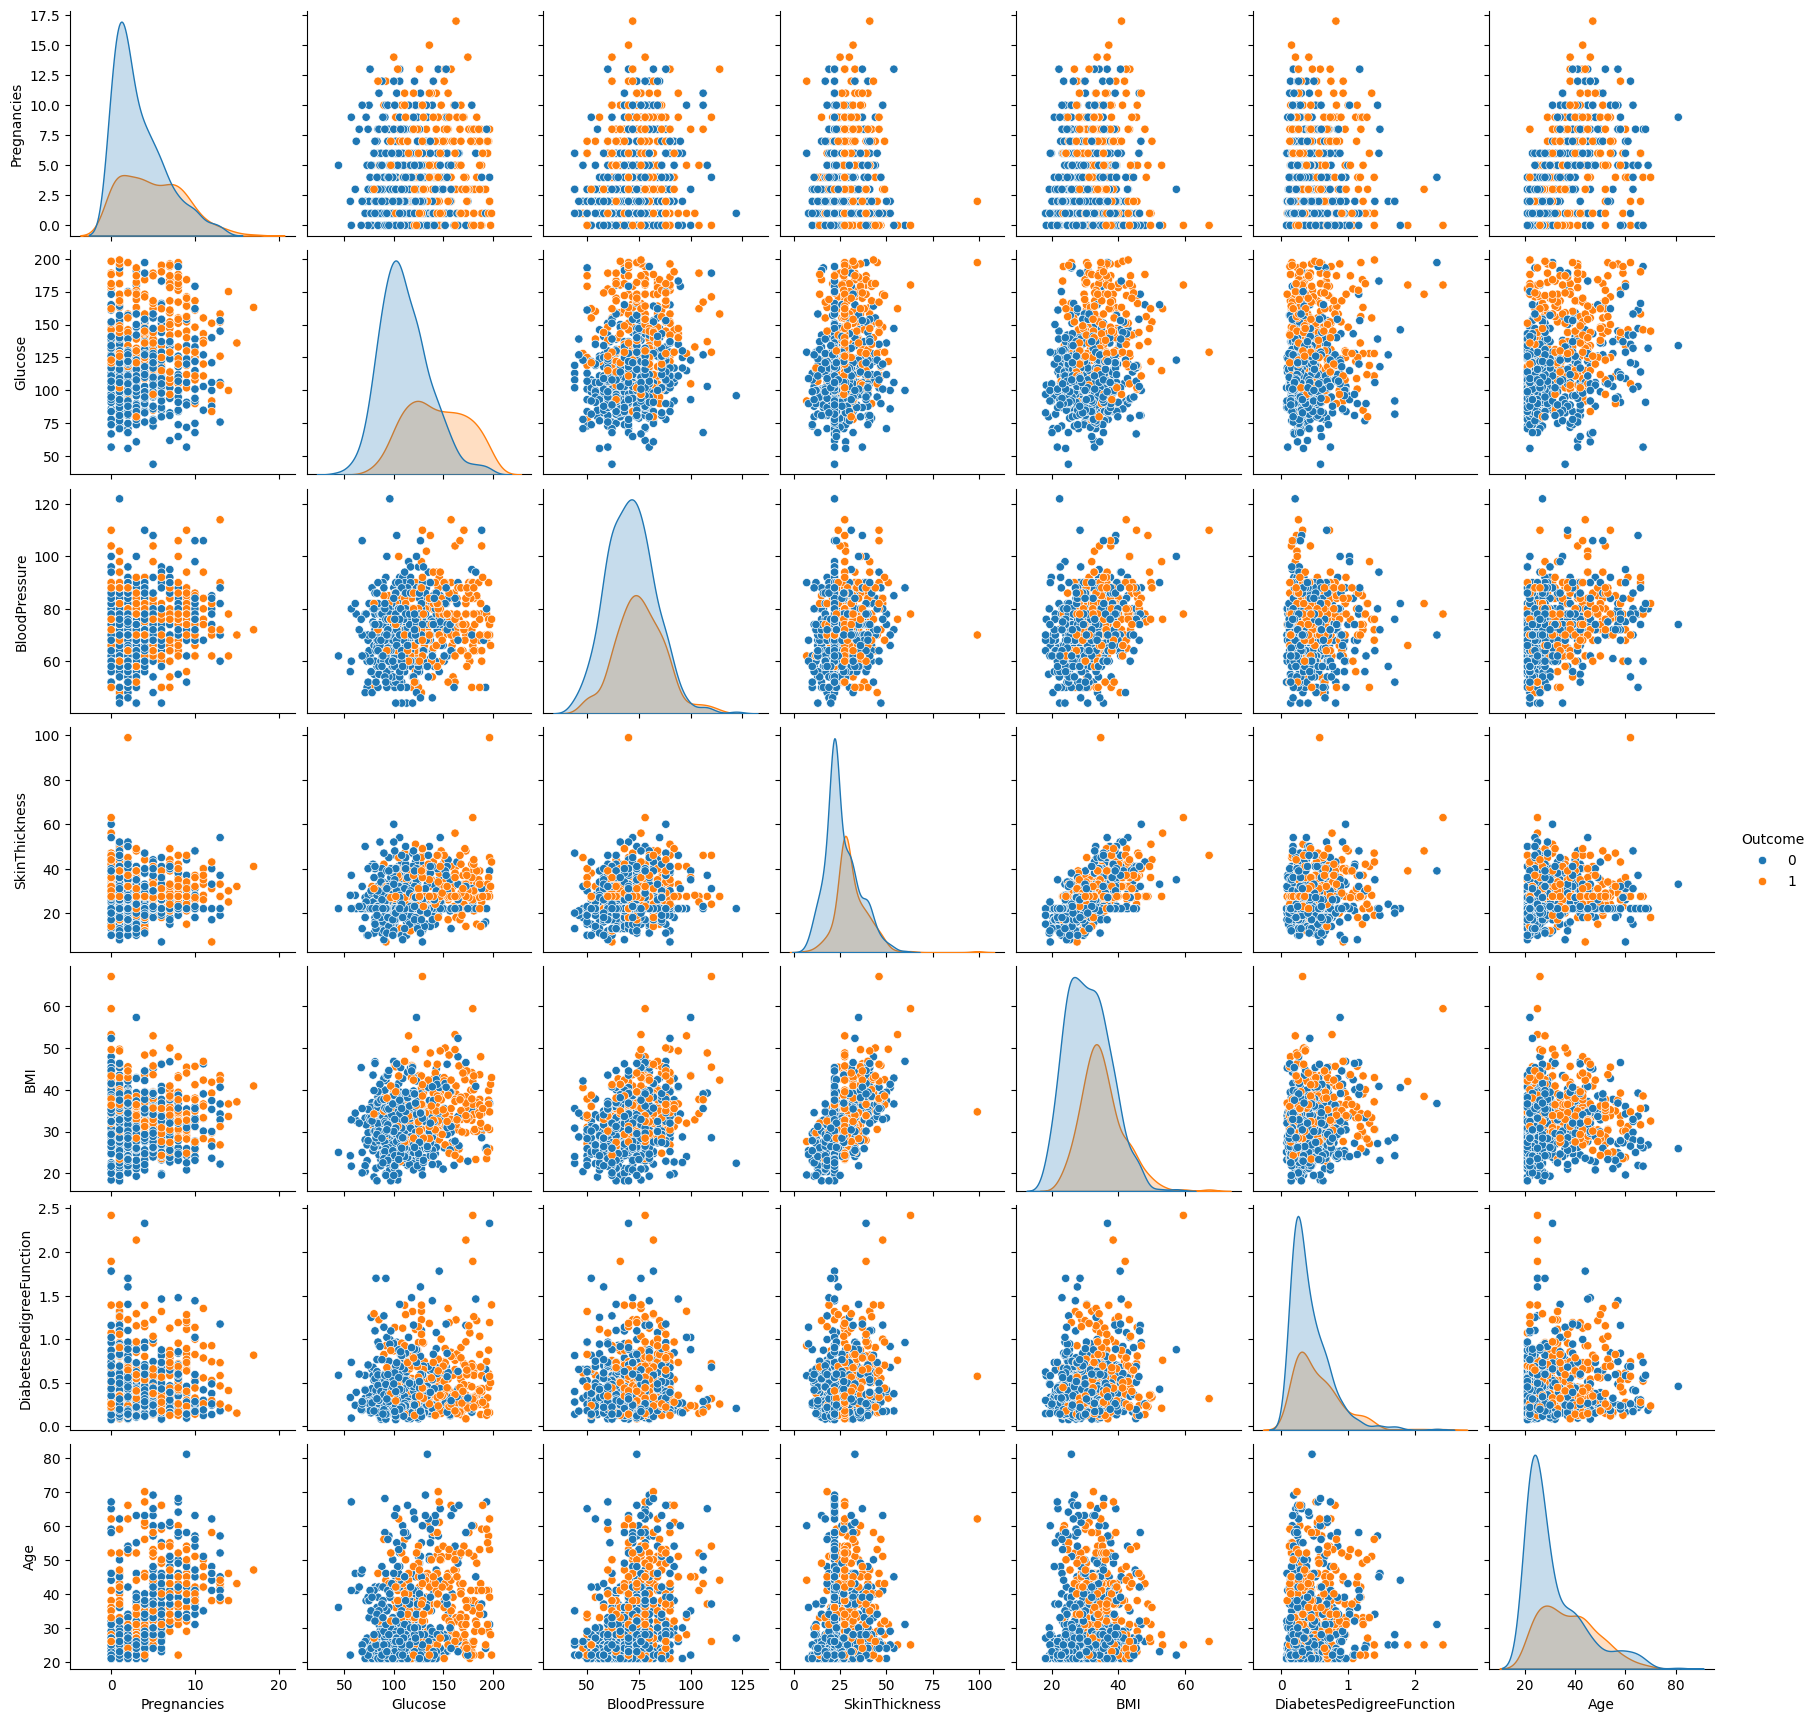

In [77]:
plt.Figure(figsize=(10,5))
#sns.PairGrid(df, hue='Outcome').map_diag(sns.histplot).map_offdiag(sns.scatterplot)
sns.pairplot(df, hue='Outcome', height=2.5)

<Axes: >

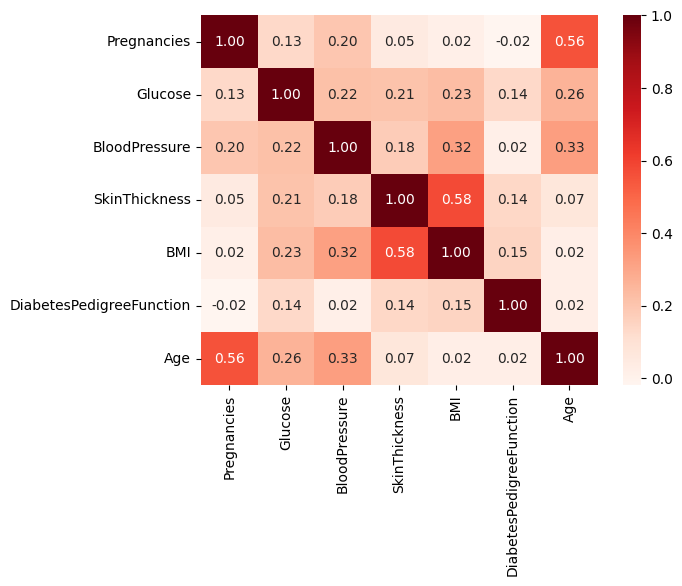

In [28]:
# Correlações

sns.heatmap(df.drop(columns=['Outcome']).corr(), annot=True, fmt=".2f", cmap='Reds')

# 2. Construção de dicionário de dados

In [ ]:
# Pregnancies: Number of times pregnant

# Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

# BloodPressure: Diastolic blood pressure (mm Hg)

# SkinThickness: Triceps skin fold thickness (mm)

# Insulin: 2-Hour serum insulin (mu U/ml)

# BMI: Body mass index (weight in kg/(height in m)^2)

# DiabetesPedigreeFunction: Diabetes pedigree function

# Age: Age (years)

# Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0

|    | Nome da Variável         | Descrição                                                | Tipo de Dado   | Valores Esperados / Faixa   |
|---:|:-------------------------|:---------------------------------------------------------|:---------------|:----------------------------|
|  0 | Pregnancies              | Número de vezes que a paciente esteve grávida            | Numérico       | 0 a 17                      |
|  1 | Glucose                  | Concentração de glicose 2h após teste oral               | Numérico       | 44 a 199                    |
|  2 | BloodPressure            | Pressão arterial diastólica (mm Hg)                      | Numérico       | 44 a 122                    |
|  3 | SkinThickness            | Espessura da prega cutânea do tríceps (mm)               | Numérico       | 7 a 99                      |
|  4 | BMI                      | Índice de massa corporal (IMC)                           | Numérico       | 18.2 a 67.1                 |
|  5 | DiabetesPedigreeFunction | Função de pedigree para diabetes                         | Numérico       | 0.078 a 2.42                |
|  6 | Age                      | Idade da paciente (anos)                                 | Numérico       | 21 a 81                     |
|  7 | Outcome                  | Classe de diagnóstico (0 = não diabética, 1 = diabética) | Binário        | 0 ou 1                      |

In [34]:
str(df['Pregnancies'].min())

'0'

In [48]:

# Lista com os dados do dicionário
data_dict = [
    ["Pregnancies", "Número de vezes que a paciente esteve grávida", "Numérico", f"{str(df['Pregnancies'].min())} a {str(df['Pregnancies'].max())}"],
    ["Glucose", "Concentração de glicose 2h após teste oral", "Numérico", f"{str(df['Glucose'].min())} a {str(df['Glucose'].max())}"],
    ["BloodPressure", "Pressão arterial diastólica (mm Hg)", "Numérico", f"{str(df['BloodPressure'].min())} a {str(df['BloodPressure'].max())}"],
    ["SkinThickness", "Espessura da prega cutânea do tríceps (mm)", "Numérico", f"{str(df['SkinThickness'].min())} a {str(df['SkinThickness'].max())}"],
    ["BMI", "Índice de massa corporal (IMC)", "Numérico", f"{str(df['BMI'].min())} a {str(df['BMI'].max())}"],
    ["DiabetesPedigreeFunction", "Função de pedigree para diabetes", "Numérico", f"{str(df['DiabetesPedigreeFunction'].min())} a {str(df['DiabetesPedigreeFunction'].max())}"],
    ["Age", "Idade da paciente (anos)", "Numérico", f"{str(df['Age'].min())} a {str(df['Age'].max())}"],
    ["Outcome", "Classe de diagnóstico (0 = não diabética, 1 = diabética)", "Binário", f"{str(df['Outcome'].min())} ou {str(df['Outcome'].max())}"]
]

# Criação do DataFrame
df_dict = pd.DataFrame(data_dict, columns=["Nome da Variável", "Descrição", "Tipo de Dado", "Valores Esperados / Faixa"])


print(df_dict.to_markdown())

|    | Nome da Variável         | Descrição                                                | Tipo de Dado   | Valores Esperados / Faixa   |
|---:|:-------------------------|:---------------------------------------------------------|:---------------|:----------------------------|
|  0 | Pregnancies              | Número de vezes que a paciente esteve grávida            | Numérico       | 0 a 17                      |
|  1 | Glucose                  | Concentração de glicose 2h após teste oral               | Numérico       | 44 a 199                    |
|  2 | BloodPressure            | Pressão arterial diastólica (mm Hg)                      | Numérico       | 44 a 122                    |
|  3 | SkinThickness            | Espessura da prega cutânea do tríceps (mm)               | Numérico       | 7.0 a 99.0                  |
|  4 | BMI                      | Índice de massa corporal (IMC)                           | Numérico       | 18.2 a 67.1                 |
|  5 | DiabetesPedig

In [49]:
# Exportar como CSV
df_dict.to_csv("dicionario_dados.csv", index=False)

# Exportar como Excel
df_dict.to_excel("dicionario_dados.xlsx", index=False)

# 3. Desenvolvimento de Modelos de Machine Learning

In [ ]:
# 1. Divida os dados em conjunto de treinamento e teste.

# 2. Escolha pelo menos dois modelos de machine learning para prever se um paciente tem diabetes (sugestão: Regressão Logística e Random Forest).

# 3. Treine os modelos com o conjunto de treinamento.

# 4. Avalie o desempenho dos modelos no conjunto de teste usando métricas como acurácia, precisão, recall e AUC-ROC. Interprete os resultados.

In [52]:
# 1. Divida os dados em conjunto de treinamento e teste.

# Features (X) e target (y)
X = df.drop(columns='Outcome')
y = df['Outcome']

# Split estratificado: 80% treino, 20% teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Verificação da proporção das classes no conjunto de treino e teste
print("Distribuição em y_train:\n", y_train.value_counts(normalize=True))
print("\nDistribuição em y_test:\n", y_test.value_counts(normalize=True))

Distribuição em y_train:
 Outcome
0    0.655652
1    0.344348
Name: proportion, dtype: float64

Distribuição em y_test:
 Outcome
0    0.659722
1    0.340278
Name: proportion, dtype: float64


In [53]:

# Instancia o scaler
scaler = MinMaxScaler()

# Ajusta o scaler apenas no conjunto de treino
X_train_scaled = scaler.fit_transform(X_train)

# Aplica o mesmo scaler no conjunto de teste
X_test_scaled = scaler.transform(X_test)

In [54]:
# Redefinir para Dataframe

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)


In [ ]:
# 2. Escolha pelo menos dois modelos de machine learning para prever se um paciente tem diabetes (sugestão: Regressão Logística e Random Forest).

# 3. Treine os modelos com o conjunto de treinamento.

In [55]:
# Definição dos algoritmos

dummy_model = DummyClassifier(strategy='stratified', random_state=42)
log_model = LogisticRegression(random_state=42)
rf_model = RandomForestClassifier(random_state=42)


# Ajuste

dummy_model.fit(X_train_scaled, y_train)
log_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)



# Predições

y_pred_dummy = dummy_model.predict(X_test_scaled)
y_pred_log = log_model.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test_scaled)



# Probabilidades para AUC-ROC

y_prob_log = log_model.predict_proba(X_test_scaled)[:, 1]
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# DummyClassifier com 'most_frequent' não gera probabilidades confiáveis para a segunda classe,
# mas para manter a consistência, usamos predict_proba se estiver disponível:
if hasattr(dummy_model, "predict_proba"):
    y_prob_dummy = dummy_model.predict_proba(X_test_scaled)[:, 1]
else:
    y_prob_dummy = None  # ou trate da forma que desejar

In [ ]:
# 4. Avalie o desempenho dos modelos no conjunto de teste usando métricas como acurácia, precisão, recall e AUC-ROC. Interprete os resultados.

# Results

df_results = pd.DataFrame({
    'Algoritmo': ['Dummy Classifier', 'Regressão Logística', 'Random Forest'],
    'Acurácia': [
        accuracy_score(y_test, y_pred_dummy),
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_rf)
    ],
    'Precisão': [
        precision_score(y_test, y_pred_dummy),
        precision_score(y_test, y_pred_log),
        precision_score(y_test, y_pred_rf)
    ],
    'Recall': [
        recall_score(y_test, y_pred_dummy),
        recall_score(y_test, y_pred_log),
        recall_score(y_test, y_pred_rf)
    ],
    'AUC-ROC': [
        roc_auc_score(y_test, y_prob_dummy) if y_prob_dummy is not None else None,
        roc_auc_score(y_test, y_prob_log),
        roc_auc_score(y_test, y_prob_rf)
    ],
})

df_results

,Algoritmo,Acurácia,Precisão,Recall,AUC-ROC
0,Dummy Classifier,0.513889,0.276596,0.265306,0.453706
1,Regressão Logística,0.812500,0.789474,0.612245,0.874973
2,Random Forest,0.854167,0.818182,0.734694,0.938024


In [29]:
# Acurácia:

# Não é a melhor métrica para fazer o report 

In [ ]:
# Precisão

# Random Forest forest foi melhor. Resultado indica que de 100% das vezes que o modelo indicar diabetes ele acertará a sua predição em 81.81% (4/5)

# Isso é útil para evitar muitos falsos positivos (ex: evitar alarmes falsos de diabetes).

In [ ]:
# Recall

# Se detectar todos os casos de risco é mais importante, então o Random Forest é preferível aqui.

In [ ]:
# AUC

# Random forest foi melhor. Consegue melhor separar as classes ao longo de diferentes thresholds.

# 4. Visualização de Resultados

SHAP para Regressão Logística


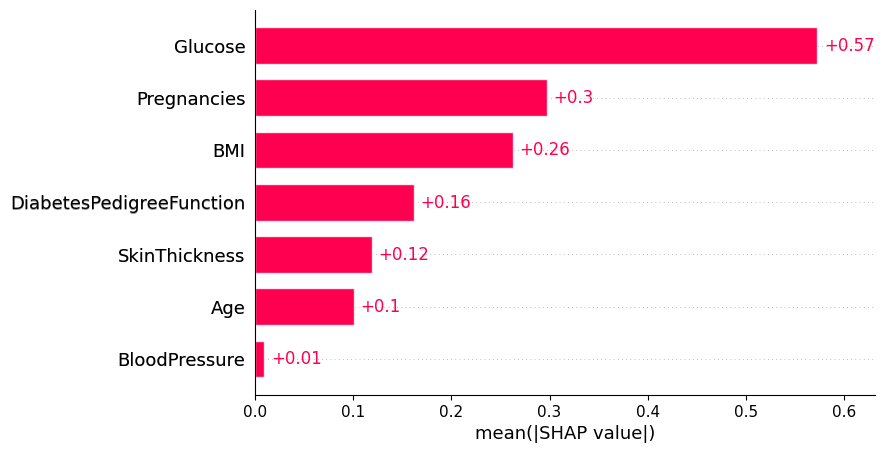

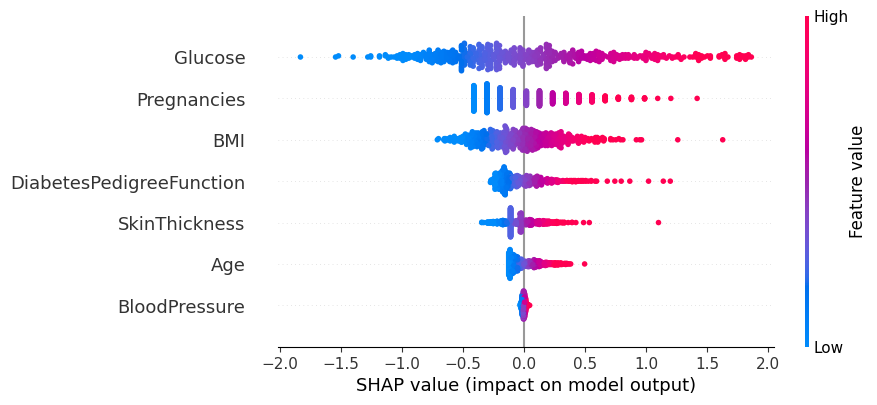

SHAP para Random Forest


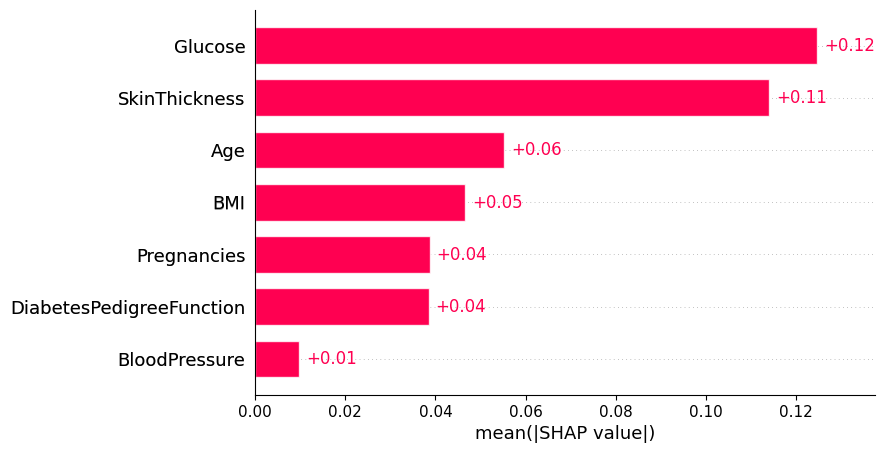

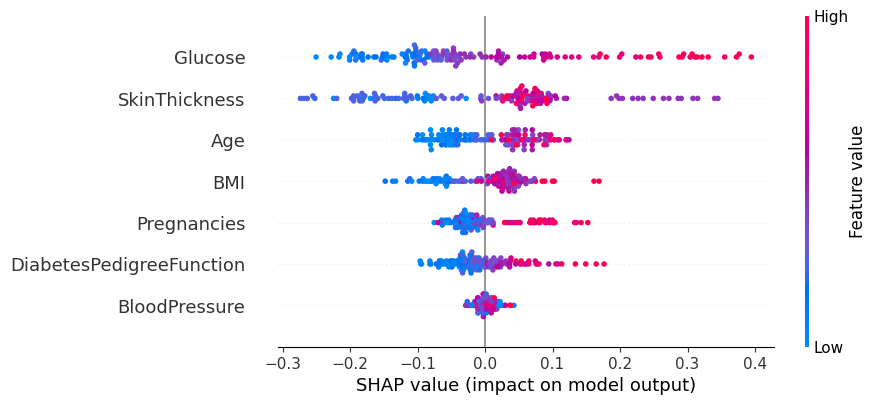

In [57]:
# Inicialização do visualizador SHAP
shap.initjs()

# -------------------------------
# SHAP para Regressão Logística
# -------------------------------
print("SHAP para Regressão Logística")

# Para modelos lineares, usa KernelExplainer (pode ser lento)
log_explainer = shap.explainers.Linear(log_model, X_train_scaled)
log_shap_values = log_explainer(X_train_scaled)

# Sumário de importância
shap.plots.bar(log_shap_values, max_display=10)


# Gráfico beeswarm para regressão
shap.plots.beeswarm(log_shap_values, max_display=10)


# -------------------------------
# SHAP para Random Forest
# -------------------------------
print("SHAP para Random Forest")

# Cria o explicador (árvores são suportadas nativamente)
explainer_rf = shap.TreeExplainer(rf_model)
shap_values_rf = explainer_rf(X_test_scaled)


# Extrair apenas os SHAP values da classe 1 (índice 1 na última dimensão)
rf_shap_values_pos = shap_values_rf.values[:, :, 1]


# Criar um novo objeto Explanation para os gráficos (SHAP v0.48+)
rf_shap_explanation = shap.Explanation(
    values=rf_shap_values_pos,
    base_values=shap_values_rf.base_values[:, 1],
    data=shap_values_rf.data,
    feature_names=X_train_scaled.columns.tolist()
)

# Sumário das importâncias das variáveis
shap.plots.bar(rf_shap_explanation, max_display=10)

# Gráfico tipo swarm (beeswarm)
shap.plots.beeswarm(rf_shap_explanation, max_display=10)




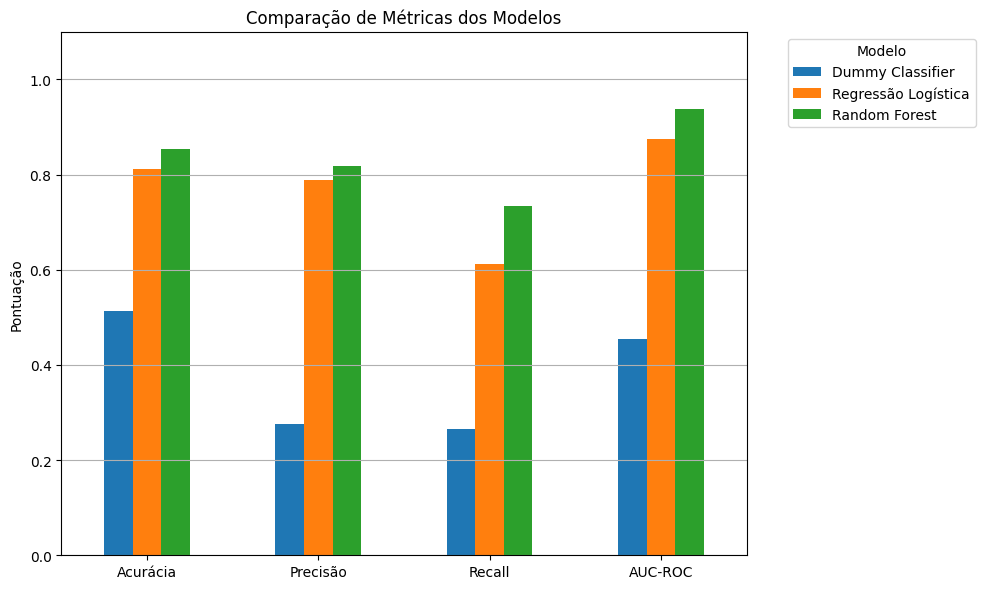

In [ ]:

# Métricas e nomes dos modelos
metricas = ['Acurácia', 'Precisão', 'Recall', 'AUC-ROC']
modelos = df_results['Algoritmo'].tolist()

# Transpor as métricas para usar no gráfico
valores = df_results[metricas].T
valores.columns = modelos  # Garante que os nomes dos modelos sejam os títulos das barras

# Plot
valores.plot(kind='bar', figsize=(10, 6))

plt.title('Comparação de Métricas dos Modelos')
plt.ylabel('Pontuação')
plt.xticks(range(len(metricas)), metricas, rotation=0)
plt.ylim(0, 1.1)  # Limite de y para melhor visualização
plt.legend(title='Modelo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()



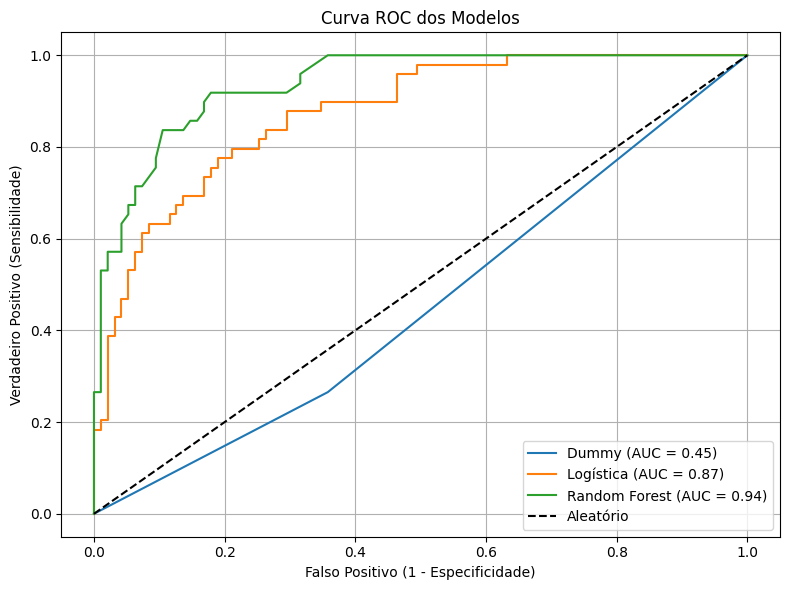

In [ ]:
# Curva ROC

plt.figure(figsize=(8, 6))

# Dummy
if y_prob_dummy is not None:
    fpr_dummy, tpr_dummy, _ = roc_curve(y_test, y_prob_dummy)
    plt.plot(fpr_dummy, tpr_dummy, label='Dummy (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob_dummy)))

# Regressão Logística
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
plt.plot(fpr_log, tpr_log, label='Logística (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob_log)))

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob_rf)))

# Diagonal
plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')

plt.title('Curva ROC dos Modelos')
plt.xlabel('Falso Positivo (1 - Especificidade)')
plt.ylabel('Verdadeiro Positivo (Sensibilidade)')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.show()


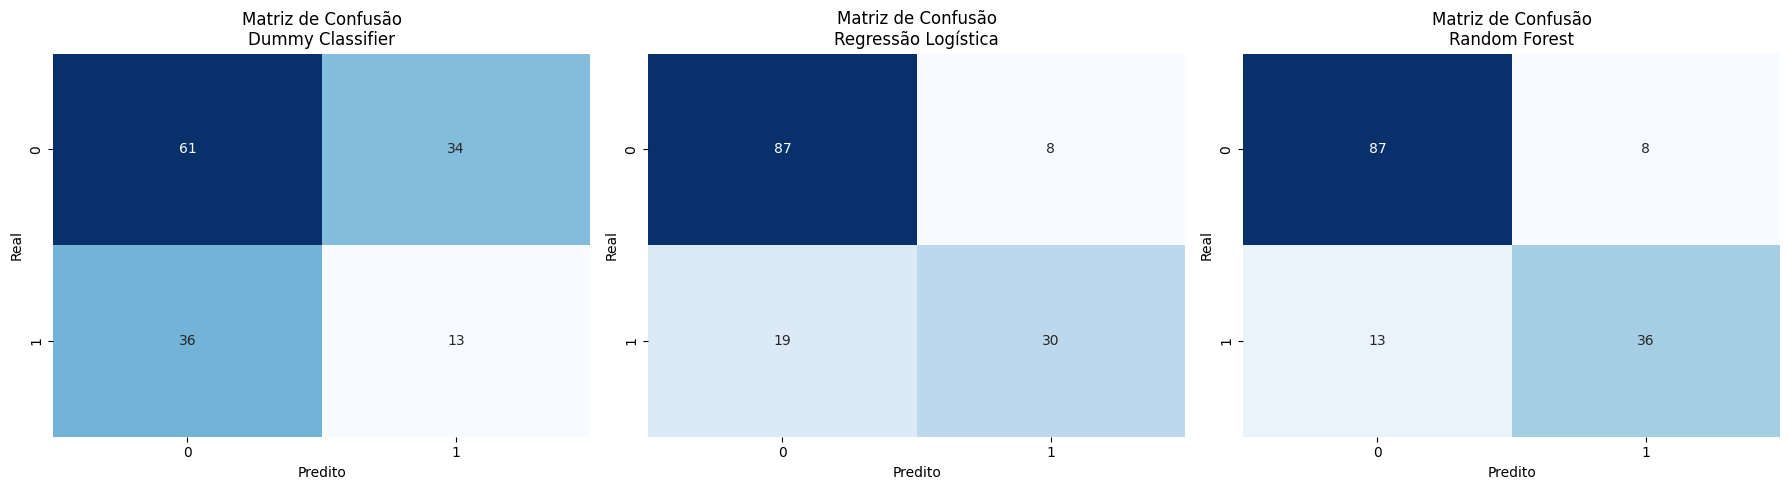

In [ ]:
# Matriz de confusão

# Lista de predições e nomes dos modelos
predicoes = [y_pred_dummy, y_pred_log, y_pred_rf]
nomes_modelos = ['Dummy Classifier', 'Regressão Logística', 'Random Forest']

# Cria figura com 3 subplots lado a lado
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Loop para gerar as 3 matrizes de confusão
for i, (y_pred, nome) in enumerate(zip(predicoes, nomes_modelos)):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[i])
    axes[i].set_title(f'Matriz de Confusão\n{nome}')
    axes[i].set_xlabel('Predito')
    axes[i].set_ylabel('Real')

plt.tight_layout()
plt.show()


In [ ]:
# Impacto financeiro

# Valores financeiros (em Reais)
valores_financeiros = {
    'VP': 10000,   # Economia
    'VN': 1000,    # Economia
    'FP': -1500,   # Custo
    'FN': -20000   # Custo
}

# Lista de predições e nomes dos modelos
predicoes = [y_pred_dummy, y_pred_log, y_pred_rf]
nomes_modelos = ['Dummy Classifier', 'Regressão Logística', 'Random Forest']

# Dicionário para armazenar os resultados
retornos_financeiros = {}

# Loop pelos modelos
for y_pred, nome in zip(predicoes, nomes_modelos):
    # Matriz de confusão
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    # Cálculo do retorno financeiro total
    retorno_total = (
        tp * valores_financeiros['VP'] +
        tn * valores_financeiros['VN'] +
        fp * valores_financeiros['FP'] +
        fn * valores_financeiros['FN']
    )
    
    # Armazena resultado
    retornos_financeiros[nome] = {
        'VP': tp,
        'VN': tn,
        'FP': fp,
        'FN': fn,
        'Retorno Total (R$)': retorno_total
    }

# Transforma em DataFrame para visualização
df_retorno = pd.DataFrame(retornos_financeiros).T
df_retorno


,VP,VN,FP,FN,Retorno Total (R$)
Dummy Classifier,13,61,34,36,-580000
Regressão Logística,30,87,8,19,-5000
Random Forest,36,87,8,13,175000


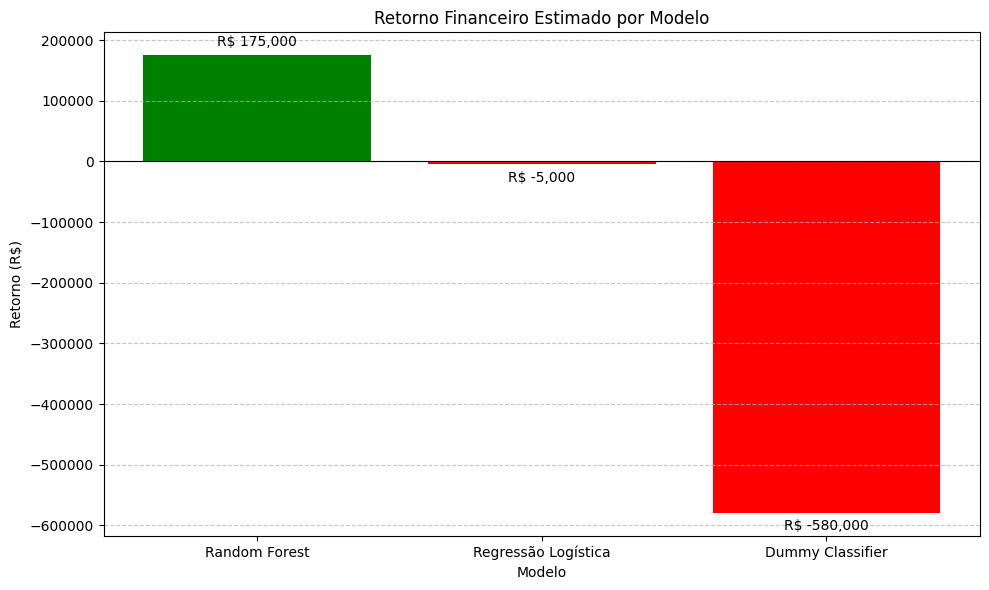

In [ ]:
# Gráfico retorno financeiro


# Garante a ordem correta no gráfico
df_retorno_plot = df_retorno.sort_values('Retorno Total (R$)', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(df_retorno_plot.index, df_retorno_plot['Retorno Total (R$)'], color=['green' if x > 0 else 'red' for x in df_retorno_plot['Retorno Total (R$)']])

# Adiciona os valores sobre as barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 10000 * (1 if yval >= 0 else -1),
             f'R$ {yval:,.0f}', ha='center', va='bottom' if yval >= 0 else 'top', fontsize=10)

plt.title('Retorno Financeiro Estimado por Modelo')
plt.ylabel('Retorno (R$)')
plt.xlabel('Modelo')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axhline(0, color='black', linewidth=0.8)
plt.tight_layout()
plt.show()


In [ ]:
plt.savefig('retorno_financeiro_modelos.png', dpi=300)

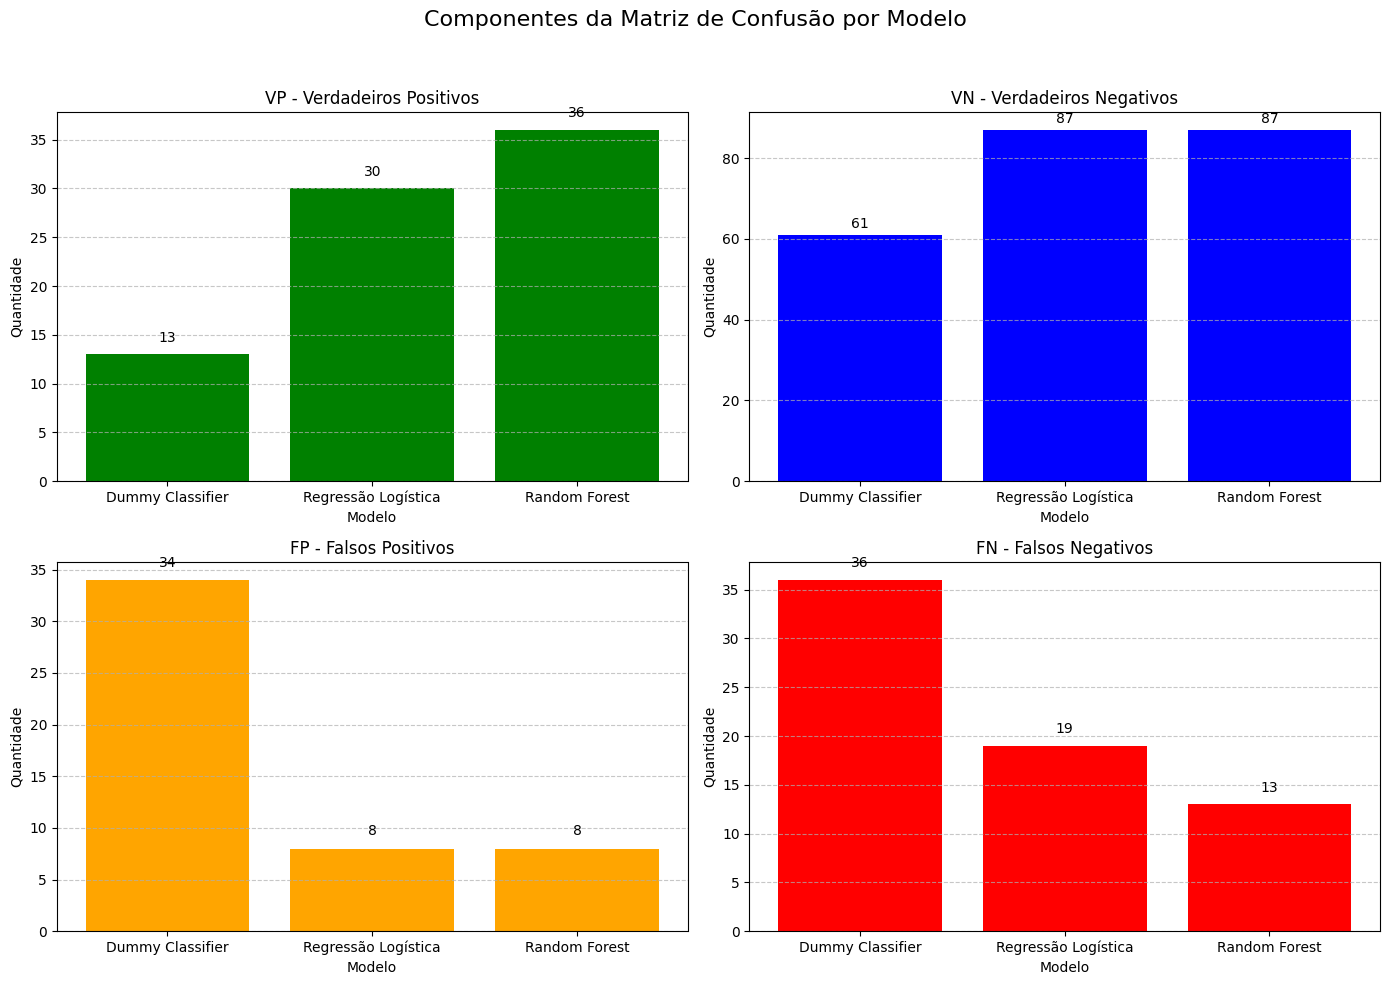

In [ ]:

# Componentes da matriz de confusão

componentes = ['VP', 'VN', 'FP', 'FN']
cores = {
    'VP': 'green',
    'VN': 'blue',
    'FP': 'orange',
    'FN': 'red'
}

# Tamanho da figura
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Um gráfico por componente
for i, comp in enumerate(componentes):
    ax = axes[i]
    valores = df_retorno[comp]
    bars = ax.bar(df_retorno.index, valores, color=cores[comp])
    
    # Adiciona os valores acima de cada barra
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 1, str(int(yval)),
                ha='center', va='bottom', fontsize=10)
    
    ax.set_title(f'{comp} - {"Verdadeiros" if comp.startswith("V") else "Falsos"} {"Positivos" if comp.endswith("P") else "Negativos"}')
    ax.set_ylabel('Quantidade')
    ax.set_xlabel('Modelo')
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.suptitle('Componentes da Matriz de Confusão por Modelo', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # espaço para título
plt.show()


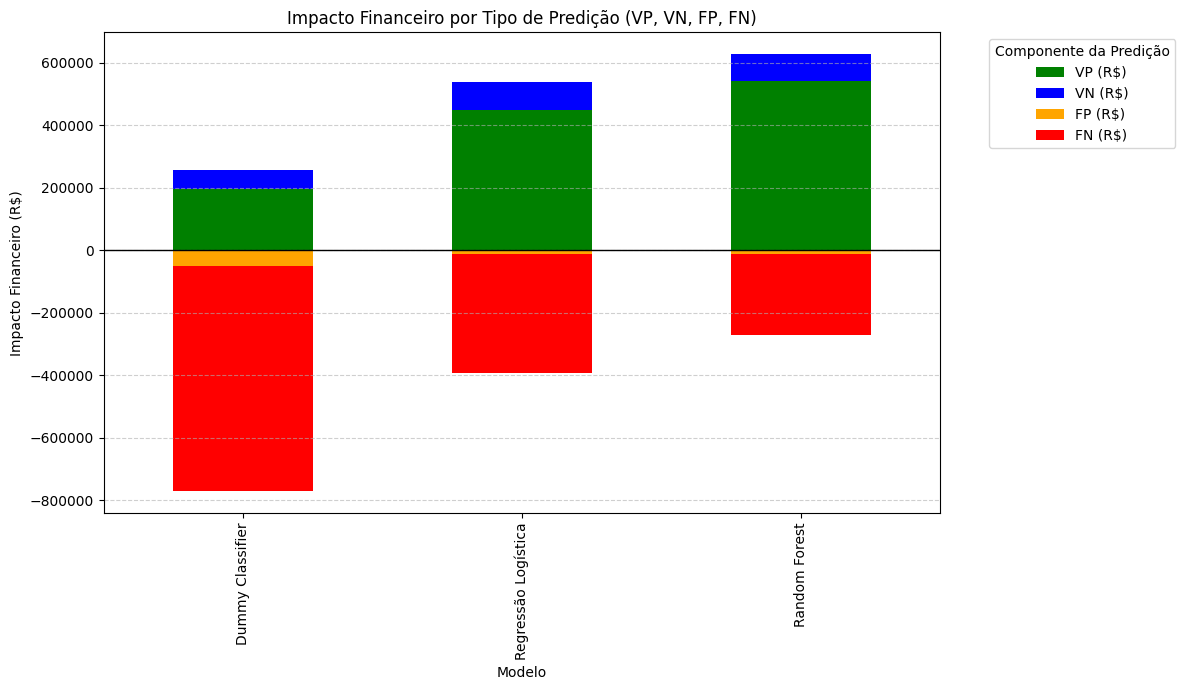

In [ ]:
# Impacto Financeiro por tipo de predição

# Valores monetários por tipo de classificação
valor_vp = 15000
valor_vn = 1000
valor_fp = -1500
valor_fn = -20000

# Cria um novo DataFrame com os impactos financeiros por modelo e componente
impactos_financeiros = pd.DataFrame({
    'VP (R$)': df_retorno['VP'] * valor_vp,
    'VN (R$)': df_retorno['VN'] * valor_vn,
    'FP (R$)': df_retorno['FP'] * valor_fp,
    'FN (R$)': df_retorno['FN'] * valor_fn
})

# Garante que a ordem das colunas seja mantida
impactos_financeiros = impactos_financeiros[['VP (R$)', 'VN (R$)', 'FP (R$)', 'FN (R$)']]

# Plot
impactos_financeiros.plot(kind='bar', stacked=True, figsize=(12, 7), color=['green', 'blue', 'orange', 'red'])

plt.title('Impacto Financeiro por Tipo de Predição (VP, VN, FP, FN)')
plt.ylabel('Impacto Financeiro (R$)')
plt.xlabel('Modelo')
plt.axhline(0, color='black', linewidth=1)
plt.legend(title='Componente da Predição', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
